In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from tqdm import tqdm
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from cuml.neighbors import KNeighborsClassifier as cuKNN  # Import cuML's KNN
from cuml.naive_bayes import GaussianNB as cuNB  
from cuml.linear_model import LogisticRegression as cuLR
from cuml.svm import SVC as cuSVM
from cuml.ensemble import RandomForestClassifier as cuRF
from cuml.metrics import roc_auc_score
from cuml.svm import SVC as cuSVC, LinearSVC as cuLinearSVC
from sklearn.model_selection import ParameterGrid, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('/mnt/c/Users/xtanv/Olympic Clean/Merged_dataset/Merged_dataset.csv')
df.head(3)

,Gender,Age,Height,Weight,NOC,Year,Season,Host_City,Events,Medal
0,Male,20.0,NaN,NaN,GER,1896.0,Summer,Athens,"Athletics Pole Vault, Men (Olympic)",NaN
1,Male,30.0,NaN,NaN,DEN,1896.0,Summer,Athens,"Athletics 500 metres Freestyle, Men (Olympic)",NaN
2,Male,24.0,NaN,NaN,AUT,1896.0,Summer,Athens,"Fencing 12-Hours Race, Men (Olympic)",Gold


In [3]:
df.shape

(143917, 10)

In [4]:
df.isnull().sum()

Gender            0
Age             832
Height        31202
Weight        37694
NOC               0
Year            183
Season          183
Host_City       183
Events            0
Medal        122393
dtype: int64

In [5]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()


# Encode and print the mapping for each column
columns_to_encode = ['Gender', 'NOC', 'Season', 'Host_City', 'Events', 'Medal']
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
    # Print the mapping
    print(f"Mapping for {column}:")
    for class_label, numeric_label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
        print(f"{class_label} -> {numeric_label}")
    print("\n")

# Display the first few rows of the transformed dataframe
df.head(3)

Mapping for Gender:
Female -> 0
Male -> 1


Mapping for NOC:
AFG -> 0
AHO -> 1
AIN -> 2
ALB -> 3
ALG -> 4
AND -> 5
ANG -> 6
ANT -> 7
ANZ -> 8
ARG -> 9
ARM -> 10
ARU -> 11
ASA -> 12
AUS -> 13
AUT -> 14
AZE -> 15
BAH -> 16
BAN -> 17
BAR -> 18
BDI -> 19
BEL -> 20
BEN -> 21
BER -> 22
BHU -> 23
BIH -> 24
BIZ -> 25
BLR -> 26
BOH -> 27
BOL -> 28
BOT -> 29
BRA -> 30
BRN -> 31
BRU -> 32
BUL -> 33
BUR -> 34
CAF -> 35
CAM -> 36
CAN -> 37
CAY -> 38
CGO -> 39
CHA -> 40
CHI -> 41
CHN -> 42
CIV -> 43
CMR -> 44
COD -> 45
COK -> 46
COL -> 47
COM -> 48
COR -> 49
CPV -> 50
CRC -> 51
CRO -> 52
CUB -> 53
CYP -> 54
CZE -> 55
DEN -> 56
DJI -> 57
DMA -> 58
DOM -> 59
ECU -> 60
EGY -> 61
EOR -> 62
ERI -> 63
ESA -> 64
ESP -> 65
EST -> 66
ETH -> 67
EUN -> 68
FIJ -> 69
FIN -> 70
FRA -> 71
FRG -> 72
FSM -> 73
GAB -> 74
GAM -> 75
GBR -> 76
GBS -> 77
GDR -> 78
GEO -> 79
GEQ -> 80
GER -> 81
GHA -> 82
GRE -> 83
GRN -> 84
GUA -> 85
GUI -> 86
GUM -> 87
GUY -> 88
HAI -> 89
HKG -> 90
HON -> 91
HUN -> 92
INA -> 93
IND -> 94

,Gender,Age,Height,Weight,NOC,Year,Season,Host_City,Events,Medal
0,1,20.0,NaN,NaN,81,1896.0,0,3,362,3
1,1,30.0,NaN,NaN,56,1896.0,0,3,246,3
2,1,24.0,NaN,NaN,14,1896.0,0,3,883,1


In [6]:
x = df.drop(['Medal'], axis=1)
y =df['Medal']
print("Shape of X:", x.shape)
print("Shape of Y:", y.shape)

Shape of X: (143917, 9)
Shape of Y: (143917,)


In [7]:
# Split the data into training and testing sets with an 80-20 split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets to ensure they are correct
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (115133, 9)
Shape of X_test: (28784, 9)
Shape of Y_train: (115133,)
Shape of Y_test: (28784,)


In [8]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shapes of the scaled datasets to ensure they are correct
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

Shape of X_train_scaled: (115133, 9)
Shape of X_test_scaled: (28784, 9)


In [9]:
# Check for NaN values in the training and testing datasets
print("NaN values in X_train_scaled:", np.isnan(X_train_scaled).sum())
print("NaN values in X_test_scaled:", np.isnan(X_test_scaled).sum())

# Initialize the KNN imputer to handle missing values
imputer = KNNImputer(n_neighbors=5)

# Impute missing values in the training and testing data with a progress bar
X_train_scaled = np.array(list(tqdm(imputer.fit_transform(X_train_scaled), desc="Imputing X_train")))
X_test_scaled = np.array(list(tqdm(imputer.transform(X_test_scaled), desc="Imputing X_test")))

print("Imputation completed.")

NaN values in X_train_scaled: 55908
NaN values in X_test_scaled: 14003


Imputing X_test: 100%|██████████| 28784/28784 [00:00<00:00, 4410508.40it/s]

Imputation completed.


In [10]:
# Apply SMOTE to handle class imbalance (no tqdm here)
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_scaled, Y_train)

print(" SMOTE completed.")

 SMOTE completed.


In [11]:
# Adjusting to binary relevance using One-vs-Rest for multiclass ROC
def plot_multiclass_roc_curve(model, X_test, Y_test, label):
    # Binarize the output labels for multi-class ROC
    Y_test_binarized = label_binarize(Y_test, classes=[0, 1, 2, 3])  # Classes: Bronze -> 0, Gold -> 1, Silver -> 2, NaN -> 3
    
    # If the model doesn't have `predict_proba`, raise an error
    if not hasattr(model, "predict_proba"):
        raise ValueError(f"Model {label} doesn't support probability estimates.")
    
    # Predict probabilities
    y_score = model.predict_proba(X_test)
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Medal labels for easier identification
    medal_labels = {0: 'Bronze', 1: 'Gold', 2: 'Silver', 3: 'NaN'}

    # Plot ROC curve for each class separately
    plt.figure(figsize=(10, 7))
    
    # Assigning specific colors to medals
    colors = {
        0: '#cd7f32',  # Bronze
        1: '#ffd700',  # Gold
        2: '#c0c0c0',  # Silver
        3: 'black'    # NaN or No Medal 
    }
    
    for i in range(4):  # Four classes (0: Bronze, 1: Gold, 2: Silver, 3: NaN)
        fpr[i], tpr[i], _ = roc_curve(Y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        RocCurveDisplay(fpr=fpr[i], tpr=tpr[i], roc_auc=roc_auc[i], estimator_name=f'{label} ({medal_labels[i]})').plot(ax=plt.gca(), color=colors[i])
    
    # Adding legend and titles
    plt.title(f"Multiclass ROC Curve for {label}")
    plt.legend([f"Class {i}: {medal_labels[i]} (AUC = {roc_auc[i]:.2f})" for i in range(4)])
    plt.show()

In [ ]:
# Wrap tqdm around the training loop for a progress bar - Logistic Regression
with tqdm(total=1, desc="Training Models", unit="model") as pbar:
    # 4. Logistic Regression
    lr = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
    lr.fit(X_train_resampled, Y_train_resampled)
    Y_pred_lr = lr.predict(X_test_scaled)
    print("Classification Report for Logistic Regression:")
    print(classification_report(Y_test, Y_pred_lr))
    plot_multiclass_roc_curve(lr, X_test_scaled, Y_test, "Logistic Regression")
    pbar.update(1)

In [ ]:
# Filter the data for actual and predicted medals
actual_medals = df[df['Medal'] != 3]
predicted_medals = df.loc[X_test.index].copy()  # Filter df to match X_test indices
predicted_medals['Medal'] = Y_pred_lr

# Group by Year and Medal to get the counts
actual_counts = actual_medals.groupby(['Year', 'Medal']).size().unstack(fill_value=0)
predicted_counts = predicted_medals.groupby(['Year', 'Medal']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(14, 8))

# Plot actual medal counts
plt.plot(actual_counts.index, actual_counts[1], label='Actual Gold', color='gold', linestyle='-')
plt.plot(actual_counts.index, actual_counts[2], label='Actual Silver', color='silver', linestyle='-')
plt.plot(actual_counts.index, actual_counts[0], label='Actual Bronze', color='#cd7f32', linestyle='-')

# Plot predicted medal counts
plt.plot(predicted_counts.index, predicted_counts[1], label='Predicted Gold', color='gold', linestyle='--')
plt.plot(predicted_counts.index, predicted_counts[2], label='Predicted Silver', color='silver', linestyle='--')
plt.plot(predicted_counts.index, predicted_counts[0], label='Predicted Bronze', color='#cd7f32', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.title('Comparison of Actual vs Predicted Medal Counts (1896-2024) -Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
with tqdm(total=1, desc="Training Models", unit="model") as pbar:
    # 4. Polymonial Regression
    degree = 4  # Specify the degree of the polynomial
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train_resampled)
    X_test_poly = poly.transform(X_test_scaled)
    # Step 2: Fit Logistic Regression on polynomial features
    lr_poly = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
    lr_poly.fit(X_train_poly, Y_train_resampled)
    Y_pred_lr_poly = lr_poly.predict(X_test_poly)
    print("Classification Report for Polynomial Logistic Regression:")
    print(classification_report(Y_test, Y_pred_lr_poly))
    plot_multiclass_roc_curve(lr_poly, X_test_poly, Y_test, "Polynomial Regression")
    pbar.update(1)

In [ ]:
# Filter the data for actual and predicted medals
actual_medals = df[df['Medal'] != 3]
predicted_medals = df.loc[X_test.index].copy()  # Filter df to match X_test indices
predicted_medals['Medal'] = Y_pred_lr_poly

# Group by Year and Medal to get the counts
actual_counts = actual_medals.groupby(['Year', 'Medal']).size().unstack(fill_value=0)
predicted_counts = predicted_medals.groupby(['Year', 'Medal']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(14, 8))

# Plot actual medal counts
plt.plot(actual_counts.index, actual_counts[1], label='Actual Gold', color='gold', linestyle='-')
plt.plot(actual_counts.index, actual_counts[2], label='Actual Silver', color='silver', linestyle='-')
plt.plot(actual_counts.index, actual_counts[0], label='Actual Bronze', color='#cd7f32', linestyle='-')

# Plot predicted medal counts
plt.plot(predicted_counts.index, predicted_counts[1], label='Predicted Gold', color='gold', linestyle='--')
plt.plot(predicted_counts.index, predicted_counts[2], label='Predicted Silver', color='silver', linestyle='--')
plt.plot(predicted_counts.index, predicted_counts[0], label='Predicted Bronze', color='#cd7f32', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.title('Comparison of Actual vs Predicted Medal Counts (1896-2024) -Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
with tqdm(total=1, desc="Training Models", unit="model") as pbar:
    # XGBoost parameter grid for tuning
    param_grid_xgb = {
        'learning_rate': [0.001, 0.01, 0.1],
        'n_estimators': [100,200,300,500],
        'max_depth': [3, 6, 10],
    }

    xgb_classifier = xgb.XGBClassifier(
        objective='multi:softmax',   # For multiclass classification
        num_class=4,                 # Number of classes
        random_state=42,             # For reproducibility
        tree_method='hist',             # Use GPU
        gpu_id=0                     # Specify the GPU ID (0 for the first GPU)
    )

    grid_search_xgb = GridSearchCV(
        estimator=xgb_classifier,
        param_grid=param_grid_xgb,
        scoring='accuracy',
        cv=5,                        # 3-fold cross-validation
        verbose=2                    # Increase verbosity to see progress
    )

    grid_search_xgb.fit(X_train_resampled, Y_train_resampled)
    best_xgb = grid_search_xgb.best_estimator_
    Y_pred_xgb = best_xgb.predict(X_test_scaled)
    print("Classification Report for XGBoost:")
    print(classification_report(Y_test, Y_pred_xgb))
    plot_multiclass_roc_curve(best_xgb, X_test_scaled, Y_test, "XGBoost")
    pbar.update(1)

In [ ]:
# Filter the data for actual and predicted medals
actual_medals = df[df['Medal'] != 3]
predicted_medals = df.loc[X_test.index].copy()  # Filter df to match X_test indices
predicted_medals['Medal'] = Y_pred_xgb

# Group by Year and Medal to get the counts
actual_counts = actual_medals.groupby(['Year', 'Medal']).size().unstack(fill_value=0)
predicted_counts = predicted_medals.groupby(['Year', 'Medal']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(14, 8))

# Plot actual medal counts
plt.plot(actual_counts.index, actual_counts[1], label='Actual Gold', color='gold', linestyle='-')
plt.plot(actual_counts.index, actual_counts[2], label='Actual Silver', color='silver', linestyle='-')
plt.plot(actual_counts.index, actual_counts[0], label='Actual Bronze', color='#cd7f32', linestyle='-')

# Plot predicted medal counts
plt.plot(predicted_counts.index, predicted_counts[1], label='Predicted Gold', color='gold', linestyle='--')
plt.plot(predicted_counts.index, predicted_counts[2], label='Predicted Silver', color='silver', linestyle='--')
plt.plot(predicted_counts.index, predicted_counts[0], label='Predicted Bronze', color='#cd7f32', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.title('Comparison of Actual vs Predicted Medal Counts (1896-2024)-XGBoost')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
from cuml.ensemble import RandomForestClassifier as cuRF  # cuML Random Forest
from sklearn.model_selection import KFold, ParameterGrid
from sklearn.metrics import classification_report
from tqdm import tqdm

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10]
}

# Calculate the total number of parameter combinations for the progress bar
param_combinations = list(ParameterGrid(param_grid_rf))
total_steps = len(param_combinations) * 5  # 3 folds for cross-validation

# Initialize the progress bar for grid search
with tqdm(total=total_steps, desc="Grid Search Progress", unit="step") as pbar:
    best_score = -1
    best_rf = None
    
    # Manually perform the grid search with a progress bar
    for params in param_combinations:
        rf = cuRF(random_state=42, **params)
        
        # Split the training data into 3 folds (cv=3)
        kf = KFold(n_splits=5)
        for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_resampled)):
            X_train_fold, X_val_fold = X_train_resampled[train_idx], X_train_resampled[val_idx]
            Y_train_fold, Y_val_fold = Y_train_resampled[train_idx], Y_train_resampled[val_idx]

            # Train the model on the training fold
            rf.fit(X_train_fold, Y_train_fold)

            # Evaluate the model on the validation fold
            score = rf.score(X_val_fold, Y_val_fold)

            # Update best model if this score is the highest
            if score > best_score:
                best_score = score
                best_rf = rf

            # Update progress bar for each fold
            pbar.update(1)

# After grid search, use the best model to predict
Y_pred_rf = best_rf.predict(X_test_scaled)

# Print the classification report
print("Classification Report for Random Forest (cuML):")
print(classification_report(Y_test, Y_pred_rf))

# If you need to plot the ROC curve for multiclass, ensure that the function is defined
# Define `plot_multiclass_roc_curve` somewhere in your code
try:
    plot_multiclass_roc_curve(best_rf, X_test_scaled, Y_test, "RandomForest")
except NameError:
    print("The function `plot_multiclass_roc_curve` is not defined. Skipping ROC plotting.")

# Update the progress bar after everything completes
pbar.update(1)



In [19]:
# Filter the data for actual and predicted medals
actual_medals = df[df['Medal'] != 3]
predicted_medals = df.loc[X_test.index].copy()  # Filter df to match X_test indices
predicted_medals['Medal'] = Y_pred_rf

# Group by Year and Medal to get the counts
actual_counts = actual_medals.groupby(['Year', 'Medal']).size().unstack(fill_value=0)
predicted_counts = predicted_medals.groupby(['Year', 'Medal']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(14, 8))

# Plot actual medal counts
plt.plot(actual_counts.index, actual_counts[1], label='Actual Gold', color='gold', linestyle='-')
plt.plot(actual_counts.index, actual_counts[2], label='Actual Silver', color='silver', linestyle='-')
plt.plot(actual_counts.index, actual_counts[0], label='Actual Bronze', color='#cd7f32', linestyle='-')

# Plot predicted medal counts
plt.plot(predicted_counts.index, predicted_counts[1], label='Predicted Gold', color='gold', linestyle='--')
plt.plot(predicted_counts.index, predicted_counts[2], label='Predicted Silver', color='silver', linestyle='--')
plt.plot(predicted_counts.index, predicted_counts[0], label='Predicted Bronze', color='#cd7f32', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.title('Comparison of Actual vs Predicted Medal Counts (1896-2024)-Random Forest')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# KNN parameter grid for hyperparameter tuning
param_grid_knn = {
    'n_neighbors': [5, 10, 20, 30],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
}

# Initialize the cuML K-Nearest Neighbors model with GPU
knn = cuKNN()

# Progress bar setup
with tqdm(total=1, desc="KNN Progress", unit="step") as pbar:
    # Perform grid search for the best KNN model
    grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', verbose=2)
    grid_search_knn.fit(X_train_resampled, Y_train_resampled)

    # Get the best KNN model from the grid search
    best_knn = grid_search_knn.best_estimator_

    # Predict on the test data using the best KNN model
    Y_pred_knn = best_knn.predict(X_test_scaled)

    # Print the classification report
    print("Classification Report for KNN (cuML):")
    print(classification_report(Y_test, Y_pred_knn))
    plot_multiclass_roc_curve(best_knn, X_test_scaled, Y_test, "KNN")
    # Update the progress bar
    pbar.update(1)

In [21]:
# Filter the data for actual and predicted medals
actual_medals = df[df['Medal'] != 3]
predicted_medals = df.loc[X_test.index].copy()  # Filter df to match X_test indices
predicted_medals['Medal'] = Y_pred_knn

# Group by Year and Medal to get the counts
actual_counts = actual_medals.groupby(['Year', 'Medal']).size().unstack(fill_value=0)
predicted_counts = predicted_medals.groupby(['Year', 'Medal']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(14, 8))

# Plot actual medal counts
plt.plot(actual_counts.index, actual_counts[1], label='Actual Gold', color='gold', linestyle='-')
plt.plot(actual_counts.index, actual_counts[2], label='Actual Silver', color='silver', linestyle='-')
plt.plot(actual_counts.index, actual_counts[0], label='Actual Bronze', color='#cd7f32', linestyle='-')

# Plot predicted medal counts
plt.plot(predicted_counts.index, predicted_counts[1], label='Predicted Gold', color='gold', linestyle='--')
plt.plot(predicted_counts.index, predicted_counts[2], label='Predicted Silver', color='silver', linestyle='--')
plt.plot(predicted_counts.index, predicted_counts[0], label='Predicted Bronze', color='#cd7f32', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.title('Comparison of Actual vs Predicted Medal Counts (1896-2024)-KNN')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# Wrap the model fitting in a progress bar
with tqdm(total=2, desc="Naive Bayes Progress", unit="step") as pbar:
    # Initialize the cuML Naive Bayes model with GPU
    nb = cuNB()
    
    # Fit the model
    nb.fit(X_train_resampled, Y_train_resampled)
    pbar.update(1)  # Progress after fitting
    
    # Predict with progress bar
    Y_pred_nb = nb.predict(X_test_scaled)
    pbar.update(1)  # Progress after predicting

# Print classification report
print("Classification Report for Naive Bayes (cuML):")
print(classification_report(Y_test, Y_pred_nb))

# Call the multiclass ROC plot function
plot_multiclass_roc_curve(nb, X_test_scaled, Y_test, "Naive Bayes")

In [23]:
# Filter the data for actual and predicted medals
actual_medals = df[df['Medal'] != 3]
predicted_medals = df.loc[X_test.index].copy()  # Filter df to match X_test indices
predicted_medals['Medal'] = Y_pred_nb

# Group by Year and Medal to get the counts
actual_counts = actual_medals.groupby(['Year', 'Medal']).size().unstack(fill_value=0)
predicted_counts = predicted_medals.groupby(['Year', 'Medal']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(14, 8))

# Plot actual medal counts
plt.plot(actual_counts.index, actual_counts[1], label='Actual Gold', color='gold', linestyle='-')
plt.plot(actual_counts.index, actual_counts[2], label='Actual Silver', color='silver', linestyle='-')
plt.plot(actual_counts.index, actual_counts[0], label='Actual Bronze', color='#cd7f32', linestyle='-')

# Plot predicted medal counts
plt.plot(predicted_counts.index, predicted_counts[1], label='Predicted Gold', color='gold', linestyle='--')
plt.plot(predicted_counts.index, predicted_counts[2], label='Predicted Silver', color='silver', linestyle='--')
plt.plot(predicted_counts.index, predicted_counts[0], label='Predicted Bronze', color='#cd7f32', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.title('Comparison of Actual vs Predicted Medal Counts (1896-2024)-Naive Bayes')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
param_grid_lgbm = {
        'learning_rate': [0.01, 0.1, 0.3],
        'n_estimators': [100, 200,300],
        'max_depth': [-1, 10, 20],
        'num_leaves': [31, 50, 100]
    }

lgbm = LGBMClassifier(objective='multiclass', random_state=42, force_row_wise=True, n_jobs=-1)
grid_search_lgbm = GridSearchCV(lgbm, param_grid_lgbm, cv=5, scoring='accuracy', verbose=2)
grid_search_lgbm.fit(X_train_resampled, Y_train_resampled)
best_lgbm = grid_search_lgbm.best_estimator_
Y_pred_lgbm = best_lgbm.predict(X_test_scaled)
print("Classification Report for LightGBM:")
print(classification_report(Y_test, Y_pred_lgbm))
plot_multiclass_roc_curve(best_lgbm, X_test_scaled, Y_test, "LightGBM")

In [25]:
# Filter the data for actual and predicted medals
actual_medals = df[df['Medal'] != 3]
predicted_medals = df.loc[X_test.index].copy()  # Filter df to match X_test indices
predicted_medals['Medal'] = Y_pred_lgbm

# Group by Year and Medal to get the counts
actual_counts = actual_medals.groupby(['Year', 'Medal']).size().unstack(fill_value=0)
predicted_counts = predicted_medals.groupby(['Year', 'Medal']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(14, 8))

# Plot actual medal counts
plt.plot(actual_counts.index, actual_counts[1], label='Actual Gold', color='gold', linestyle='-')
plt.plot(actual_counts.index, actual_counts[2], label='Actual Silver', color='silver', linestyle='-')
plt.plot(actual_counts.index, actual_counts[0], label='Actual Bronze', color='#cd7f32', linestyle='-')

# Plot predicted medal counts
plt.plot(predicted_counts.index, predicted_counts[1], label='Predicted Gold', color='gold', linestyle='--')
plt.plot(predicted_counts.index, predicted_counts[2], label='Predicted Silver', color='silver', linestyle='--')
plt.plot(predicted_counts.index, predicted_counts[0], label='Predicted Bronze', color='#cd7f32', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.title('Comparison of Actual vs Predicted Medal Counts (1896-2024)-LightGBM')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# Wrap tqdm around the training loop for a progress bar
with tqdm(total=1, desc="Training Models", unit="model") as pbar:
    param_grid_ab = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.001, 0.01, 0.1]
    }
    ab = AdaBoostClassifier(random_state=42, algorithm='SAMME')
    grid_search_ab = GridSearchCV(ab, param_grid_ab, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
    grid_search_ab.fit(X_train_resampled, Y_train_resampled)
    best_ab = grid_search_ab.best_estimator_
    Y_pred_ab = best_ab.predict(X_test_scaled)
    print("Classification Report for AdaBoost:")
    print(classification_report(Y_test, Y_pred_ab))
    plot_multiclass_roc_curve(best_ab, X_test_scaled, Y_test, "AdaBoost")
    pbar.update(1)

In [27]:
# Filter the data for actual and predicted medals
actual_medals = df[df['Medal'] != 3]
predicted_medals = df.loc[X_test.index].copy()  # Filter df to match X_test indices
predicted_medals['Medal'] = Y_pred_ab

# Group by Year and Medal to get the counts
actual_counts = actual_medals.groupby(['Year', 'Medal']).size().unstack(fill_value=0)
predicted_counts = predicted_medals.groupby(['Year', 'Medal']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(14, 8))

# Plot actual medal counts
plt.plot(actual_counts.index, actual_counts[1], label='Actual Gold', color='gold', linestyle='-')
plt.plot(actual_counts.index, actual_counts[2], label='Actual Silver', color='silver', linestyle='-')
plt.plot(actual_counts.index, actual_counts[0], label='Actual Bronze', color='#cd7f32', linestyle='-')

# Plot predicted medal counts
plt.plot(predicted_counts.index, predicted_counts[1], label='Predicted Gold', color='gold', linestyle='--')
plt.plot(predicted_counts.index, predicted_counts[2], label='Predicted Silver', color='silver', linestyle='--')
plt.plot(predicted_counts.index, predicted_counts[0], label='Predicted Bronze', color='#cd7f32', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.title('Comparison of Actual vs Predicted Medal Counts (1896-2024)-AdaBoost')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# Wrap tqdm around the training loop for a progress bar
with tqdm(total=1, desc="Training Models", unit="model") as pbar:
    param_grid_dt = {
        'criterion': ['gini', 'entropy'],  
        'max_depth': [5, 10, 20, None],  
        'min_samples_split': [2, 5, 10, 20],  
        'min_samples_leaf': [1, 2, 5] 
    }
    dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')  # Class balancing for imbalanced data
    
    # Use GridSearchCV with 5-fold cross-validation, n_jobs=-1 for parallelism
    grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
    grid_search_dt.fit(X_train_resampled, Y_train_resampled)
    
    # Get the best estimator
    best_dt = grid_search_dt.best_estimator_
    
    # Predict on the test set
    Y_pred_dt = best_dt.predict(X_test_scaled)
    
    # Print the classification report
    print("Classification Report for Decision Tree:")
    print(classification_report(Y_test, Y_pred_dt))
    
    # Plot ROC curve
    plot_multiclass_roc_curve(best_dt, X_test_scaled, Y_test, "Decision Tree")
    
    # Update progress bar
    pbar.update(1)

In [29]:
# Filter the data for actual and predicted medals
actual_medals = df[df['Medal'] != 3]
predicted_medals = df.loc[X_test.index].copy()  # Filter df to match X_test indices
predicted_medals['Medal'] = Y_pred_dt

# Group by Year and Medal to get the counts
actual_counts = actual_medals.groupby(['Year', 'Medal']).size().unstack(fill_value=0)
predicted_counts = predicted_medals.groupby(['Year', 'Medal']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(14, 8))

# Plot actual medal counts
plt.plot(actual_counts.index, actual_counts[1], label='Actual Gold', color='gold', linestyle='-')
plt.plot(actual_counts.index, actual_counts[2], label='Actual Silver', color='silver', linestyle='-')
plt.plot(actual_counts.index, actual_counts[0], label='Actual Bronze', color='#cd7f32', linestyle='-')

# Plot predicted medal counts
plt.plot(predicted_counts.index, predicted_counts[1], label='Predicted Gold', color='gold', linestyle='--')
plt.plot(predicted_counts.index, predicted_counts[2], label='Predicted Silver', color='silver', linestyle='--')
plt.plot(predicted_counts.index, predicted_counts[0], label='Predicted Bronze', color='#cd7f32', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.title('Comparison of Actual vs Predicted Medal Counts (1896-2024)-Decision Tree')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Wrap tqdm around the training loop for a progress bar
with tqdm(total=1, desc="Training Models", unit="model") as pbar:
    
    param_grid_et = {
    'n_estimators': [100, 200],            # Stick to 100-200 estimators
    'max_depth': [20, 30],                 # Restrict depth to avoid memory issues
    'min_samples_split': [5, 10],          # Prevent very small splits, reducing tree size
    'min_samples_leaf': [5, 10],           # Minimum samples per leaf to reduce complexity
    'max_features': ['sqrt', 'log2'],      # Limit features to control tree size
    }

    et = ExtraTreesClassifier(random_state=42, class_weight='balanced')
    grid_search_et = GridSearchCV(et, param_grid_et, cv=5, scoring='accuracy', verbose=2, n_jobs=4)
    grid_search_et.fit(X_train_resampled, Y_train_resampled)
    best_et = grid_search_et.best_estimator_
    Y_pred_et = best_et.predict(X_test_scaled)
    print("Classification Report for Extra Trees:")
    print(classification_report(Y_test, Y_pred_et))
    plot_multiclass_roc_curve(best_et, X_test_scaled, Y_test, "Extra Trees")
    pbar.update(1)

In [ ]:
# Filter the data for actual and predicted medals
actual_medals = df[df['Medal'] != 3]
predicted_medals = df.loc[X_test.index].copy()  # Filter df to match X_test indices
predicted_medals['Medal'] = Y_pred_et

# Group by Year and Medal to get the counts
actual_counts = actual_medals.groupby(['Year', 'Medal']).size().unstack(fill_value=0)
predicted_counts = predicted_medals.groupby(['Year', 'Medal']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(14, 8))

# Plot actual medal counts
plt.plot(actual_counts.index, actual_counts[1], label='Actual Gold', color='gold', linestyle='-')
plt.plot(actual_counts.index, actual_counts[2], label='Actual Silver', color='silver', linestyle='-')
plt.plot(actual_counts.index, actual_counts[0], label='Actual Bronze', color='#cd7f32', linestyle='-')

# Plot predicted medal counts
plt.plot(predicted_counts.index, predicted_counts[1], label='Predicted Gold', color='gold', linestyle='--')
plt.plot(predicted_counts.index, predicted_counts[2], label='Predicted Silver', color='silver', linestyle='--')
plt.plot(predicted_counts.index, predicted_counts[0], label='Predicted Bronze', color='#cd7f32', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.title('Comparison of Actual vs Predicted Medal Counts (1896-2024)-Extra Trees')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Wrap tqdm around the training loop for a progress bar
with tqdm(total=1, desc="Training Models", unit="model") as pbar:
    # 9. Gradient Boosting
    param_grid_gb = {
        'learning_rate': [0.01, 0.1],
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 10],
    }
    
    gb = GradientBoostingClassifier(random_state=42)
    
    # Use GridSearchCV with increased cross-validation (cv=10)
    grid_search_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
    grid_search_gb.fit(X_train_resampled, Y_train_resampled)
    
    # Get the best estimator
    best_gb = grid_search_gb.best_estimator_
    
    # Predict on the test set
    Y_pred_gb = best_gb.predict(X_test_scaled)
    
    # Print the classification report
    print("Classification Report for Gradient Boosting:")
    print(classification_report(Y_test, Y_pred_gb))
    
    # Plot ROC curve
    plot_multiclass_roc_curve(best_gb, X_test_scaled, Y_test, "Gradient Boosting")
    
    # Update progress bar
    pbar.update(1)

In [ ]:
# Filter the data for actual and predicted medals
actual_medals = df[df['Medal'] != 3]
predicted_medals = df.loc[X_test.index].copy()  # Filter df to match X_test indices
predicted_medals['Medal'] = Y_pred_gb

# Group by Year and Medal to get the counts
actual_counts = actual_medals.groupby(['Year', 'Medal']).size().unstack(fill_value=0)
predicted_counts = predicted_medals.groupby(['Year', 'Medal']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(14, 8))

# Plot actual medal counts
plt.plot(actual_counts.index, actual_counts[1], label='Actual Gold', color='gold', linestyle='-')
plt.plot(actual_counts.index, actual_counts[2], label='Actual Silver', color='silver', linestyle='-')
plt.plot(actual_counts.index, actual_counts[0], label='Actual Bronze', color='#cd7f32', linestyle='-')

# Plot predicted medal counts
plt.plot(predicted_counts.index, predicted_counts[1], label='Predicted Gold', color='gold', linestyle='--')
plt.plot(predicted_counts.index, predicted_counts[2], label='Predicted Silver', color='silver', linestyle='--')
plt.plot(predicted_counts.index, predicted_counts[0], label='Predicted Bronze', color='#cd7f32', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.title('Comparison of Actual vs Predicted Medal Counts (1896-2024)- Gradient Boosting')
plt.legend()
plt.grid(True)
plt.show()

Training Models:   0%|          | 0/1 [00:00<?, ?model/s]

Training cuML SVM with parameters: {'C': 0.1, 'gamma': 'scale'}
Average CV Accuracy: 0.35446804308722674
Training cuML SVM with parameters: {'C': 0.1, 'gamma': 'auto'}
Average CV Accuracy: 0.3539211036092551
Training cuML SVM with parameters: {'C': 1, 'gamma': 'scale'}
Average CV Accuracy: 0.4096194974663135
Training cuML SVM with parameters: {'C': 1, 'gamma': 'auto'}
Average CV Accuracy: 0.4089779923031947
Training cuML SVM with parameters: {'C': 10, 'gamma': 'scale'}
Average CV Accuracy: 0.4686889857459057
Training cuML SVM with parameters: {'C': 10, 'gamma': 'auto'}
Average CV Accuracy: 0.467909469905451
Best parameters: {'C': 10, 'gamma': 'scale'}
Best CV accuracy: 0.4686889857459057
Classification Report for SVM (cuML):
              precision    recall  f1-score   support

           0       0.06      0.25      0.10      1452
           1       0.08      0.28      0.12      1337
           2       0.06      0.21      0.10      1419
           3       0.91      0.51      0.65     

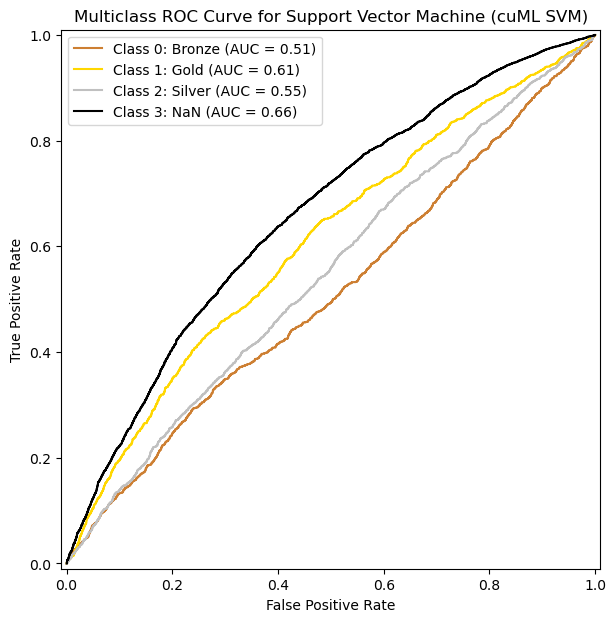

Training Models: 100%|██████████| 1/1 [4:56:42<00:00, 17802.38s/model]


In [12]:
# Function to perform manual grid search with cross-validation
def manual_grid_search_cuml_svm_cv(X_train, Y_train, param_grid, cv=5):
    best_score = 0
    best_params = None
    best_model = None

    skf = StratifiedKFold(n_splits=cv)
    
    for params in ParameterGrid(param_grid):
        print(f"Training cuML SVM with parameters: {params}")
        fold_scores = []

        for train_idx, val_idx in skf.split(X_train, Y_train):
            X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
            Y_train_fold, Y_val_fold = Y_train[train_idx], Y_train[val_idx]

            # Only using RBF kernel, so no need for conditional kernel check
            svm = cuSVC(C=params['C'], kernel='rbf', probability=True, gamma=params['gamma'])

            # Train SVM on the current fold
            svm.fit(X_train_fold, Y_train_fold)

            # Predict on the validation fold
            Y_val_pred = svm.predict(X_val_fold)
            Y_val_pred = np.array(Y_val_pred)  # Move predictions to CPU

            # Calculate accuracy for the fold
            fold_score = accuracy_score(Y_val_fold, Y_val_pred)
            fold_scores.append(fold_score)

        # Average score across all folds
        avg_score = np.mean(fold_scores)
        print(f"Average CV Accuracy: {avg_score}")

        if avg_score > best_score:
            best_score = avg_score
            best_params = params
            best_model = svm

    print(f"Best parameters: {best_params}")
    print(f"Best CV accuracy: {best_score}")
    return best_model

# Wrap tqdm around the training loop for a progress bar
with tqdm(total=1, desc="Training Models", unit="model") as pbar:
    # Only RBF kernel is used in this grid search
    param_grid_svm = {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto']  # Gamma parameter for RBF kernel
    }

    # Perform manual grid search using cuML SVM with cross-validation
    best_svm = manual_grid_search_cuml_svm_cv(X_train_resampled, Y_train_resampled, param_grid_svm, cv=5)

    # Predict using the best SVM model on the test set
    Y_pred_svm = best_svm.predict(X_test_scaled)

    # Convert predictions back to CPU
    Y_pred_svm = np.array(Y_pred_svm)

    # Print classification report
    print("Classification Report for SVM (cuML):")
    print(classification_report(Y_test, Y_pred_svm))

    # Plot ROC curve (adjust to handle cuML GPU data if necessary)
    plot_multiclass_roc_curve(best_svm, X_test_scaled, Y_test, "Support Vector Machine (cuML SVM)")

    pbar.update(1)


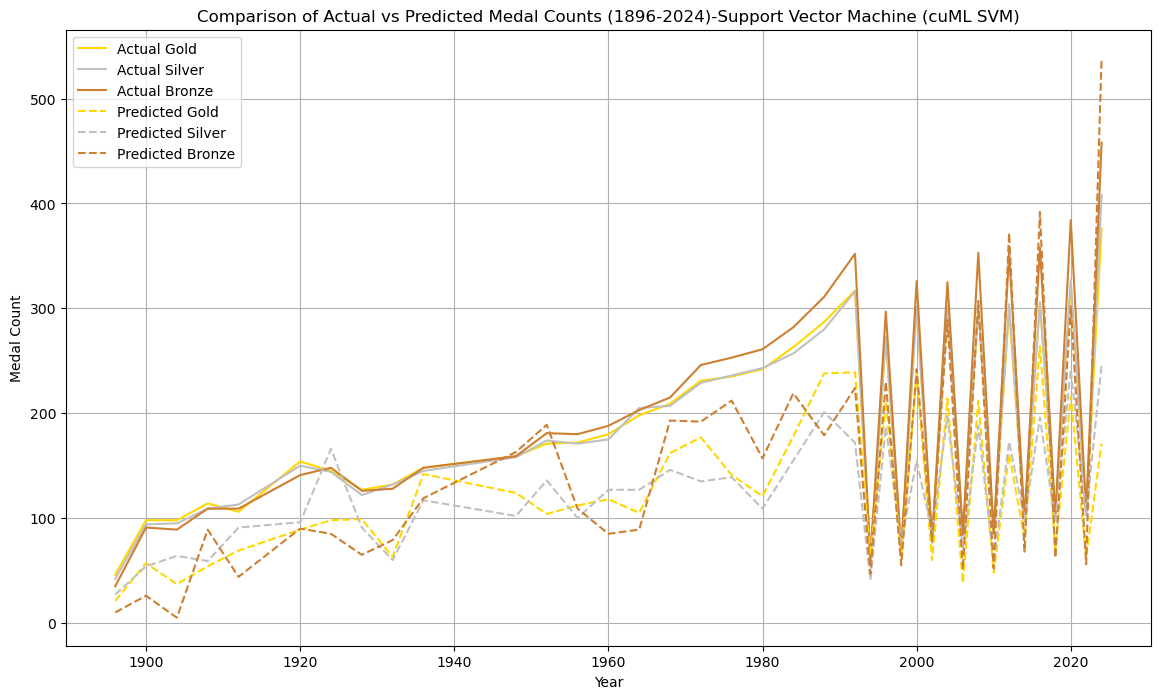

In [13]:
# Filter the data for actual and predicted medals
actual_medals = df[df['Medal'] != 3]
predicted_medals = df.loc[X_test.index].copy()  # Filter df to match X_test indices
predicted_medals['Medal'] = Y_pred_svm

# Group by Year and Medal to get the counts
actual_counts = actual_medals.groupby(['Year', 'Medal']).size().unstack(fill_value=0)
predicted_counts = predicted_medals.groupby(['Year', 'Medal']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(14, 8))

# Plot actual medal counts
plt.plot(actual_counts.index, actual_counts[1], label='Actual Gold', color='gold', linestyle='-')
plt.plot(actual_counts.index, actual_counts[2], label='Actual Silver', color='silver', linestyle='-')
plt.plot(actual_counts.index, actual_counts[0], label='Actual Bronze', color='#cd7f32', linestyle='-')

# Plot predicted medal counts
plt.plot(predicted_counts.index, predicted_counts[1], label='Predicted Gold', color='gold', linestyle='--')
plt.plot(predicted_counts.index, predicted_counts[2], label='Predicted Silver', color='silver', linestyle='--')
plt.plot(predicted_counts.index, predicted_counts[0], label='Predicted Bronze', color='#cd7f32', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.title('Comparison of Actual vs Predicted Medal Counts (1896-2024)-Support Vector Machine (cuML SVM)')
plt.legend()
plt.grid(True)
plt.show()